# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | vung tau
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tweed heads
Processing Record 8 of Set 1 | seria
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | el nido
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | lobito
Processing Record 15 of Set 1 | peniche
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | meadow lake
Processing Record 21 of Set 1 | sao felix do xingu
Processing Record 22 of Set 1 | tezu
Processing Record 23 of Set 1 | h

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,48.52,41,20,4.61,US,1712800589
1,isafjordur,66.0755,-23.1240,25.27,88,92,4.16,IS,1712800589
2,grytviken,-54.2811,-36.5092,34.12,95,32,14.61,GS,1712800590
3,vung tau,10.3460,107.0843,84.65,71,10,23.80,VN,1712800590
4,blackmans bay,-43.0167,147.3167,59.52,61,47,1.99,AU,1712800591


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,48.52,41,20,4.61,US,1712800589
1,isafjordur,66.0755,-23.1240,25.27,88,92,4.16,IS,1712800589
2,grytviken,-54.2811,-36.5092,34.12,95,32,14.61,GS,1712800590
3,vung tau,10.3460,107.0843,84.65,71,10,23.80,VN,1712800590
4,blackmans bay,-43.0167,147.3167,59.52,61,47,1.99,AU,1712800591


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

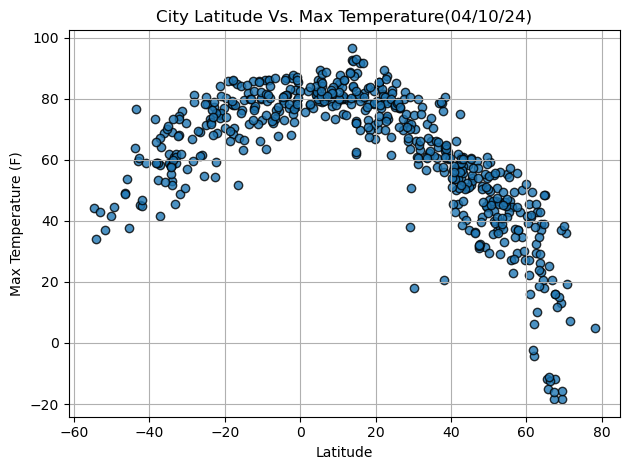

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

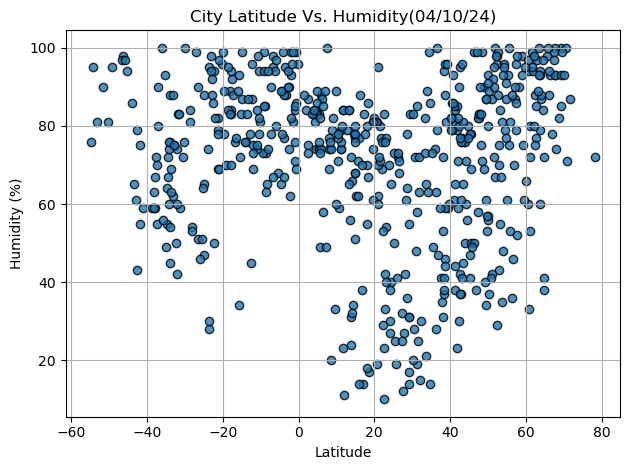

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

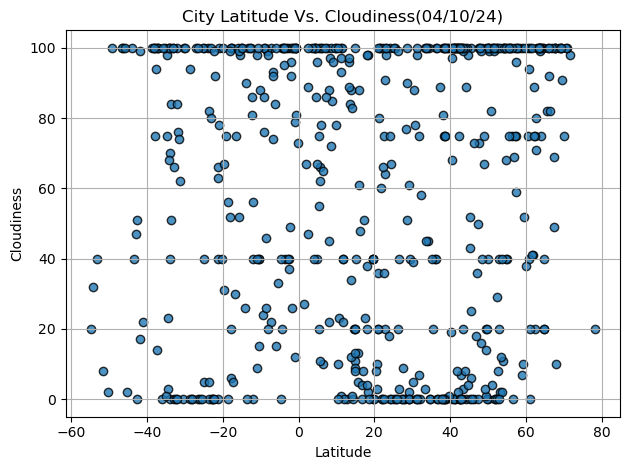

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

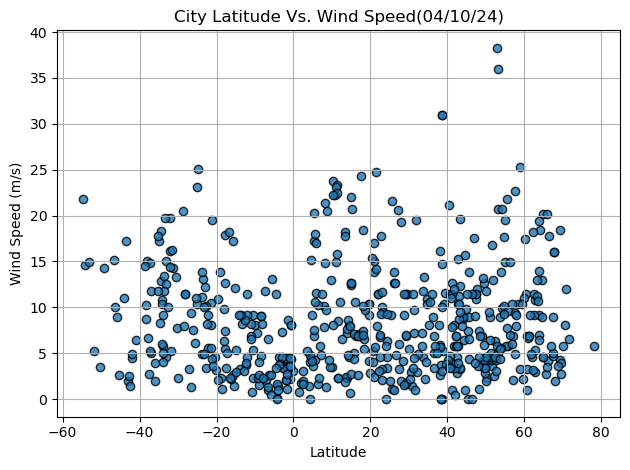

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,48.52,41,20,4.61,US,1712800589
1,isafjordur,66.0755,-23.1240,25.27,88,92,4.16,IS,1712800589
3,vung tau,10.3460,107.0843,84.65,71,10,23.80,VN,1712800590
7,seria,4.6167,114.3167,86.22,74,86,4.36,BN,1712800592
8,lihue,21.9789,-159.3672,81.64,69,0,11.50,US,1712800592


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,34.12,95,32,14.61,GS,1712800590
4,blackmans bay,-43.0167,147.3167,59.52,61,47,1.99,AU,1712800591
5,margaret river,-33.9500,115.0667,68.97,45,100,9.17,AU,1712800591
6,tweed heads,-28.1817,153.5470,81.21,54,0,11.50,AU,1712800591
9,ushuaia,-54.8000,-68.3000,44.26,76,20,21.85,AR,1712800324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8651625200160769


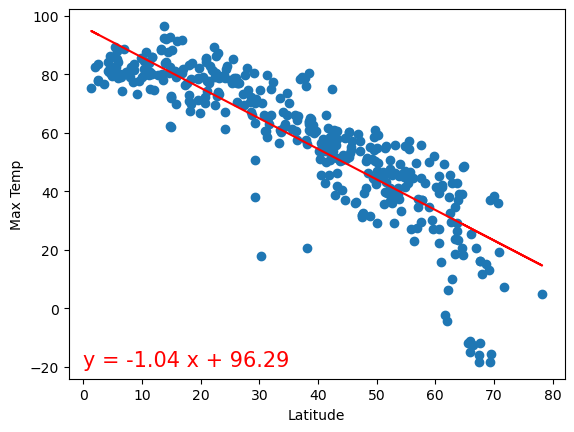

In [64]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')


The r-value is 0.7750856864338567


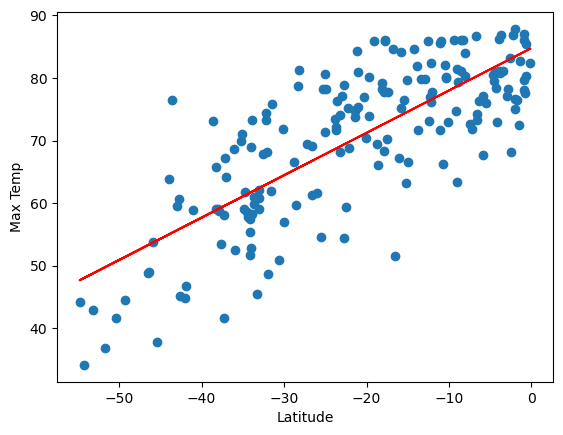

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [80]:
print("Northern hemisphere relationship:")
print("The linear regression shows a negative relationship between the latitude and temperature, since as the latitude")
print("increases, the temperature decreases. While the city is further from the Equator, the temperature decreases.")
print("--------------------------------------")
print("Southern hemisphere relationship:")
print("The linear regression shows a positive relationship between the latitude and temperature. The temperature increases")
print("as the latitude increases. The closer the city is to the Equator, the temperature rises.")

Northern hemisphere relationship:
The linear regression shows a negative relationship between the latitude and temperature, since as the latitude
increases, the temperature decreases. While the city is further from the Equator, the temperature decreases.
--------------------------------------
Southern hemisphere relationship:
The linear regression shows a positive relationship between the latitude and temperature. The temperature increases
as the latitude increases. The closer the city is to the Equator, the temperature rises.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.24040139032561622


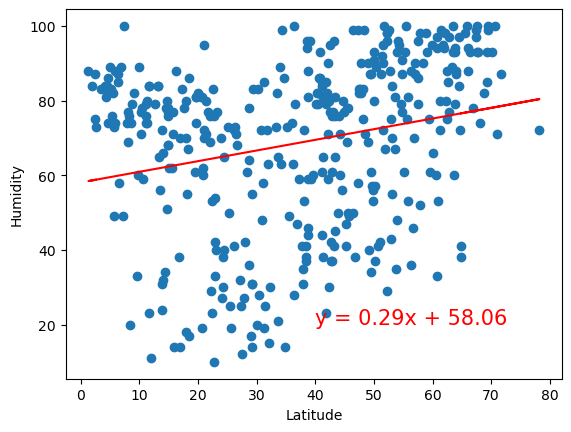

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.2563367984815612


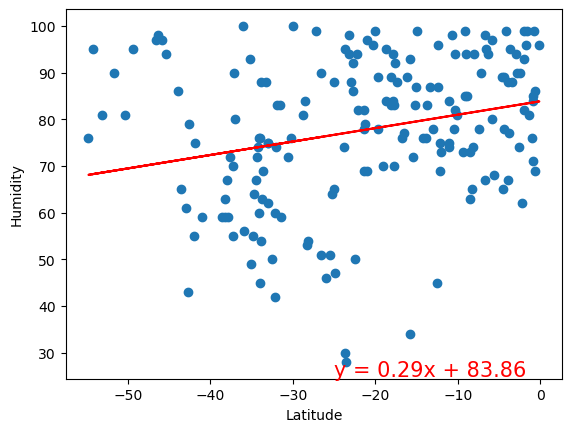

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [84]:
print("Northern hemisphere relationship:")
print("The relationship between the latitude and humidity shows as positive slope, however this slope is not significant and")
print("there is not a strong correlation between the latitude and humidity.")
print("--------------------------------------")
print("Southern hemisphere relationship:")
print("For southern hemisphere cities, the latitude and humidity shows a higher positive slope and the humidity increases")
print("as the latitude increments.")

Northern hemisphere relationship:
The relationship between the latitude and humidity shows as positive slope, however this slope is not significant and
there is not a strong correlation between the latitude and humidity.
--------------------------------------
Southern hemisphere relationship:
For southern hemisphere cities, the latitude and humidity shows a higher positive slope and the humidity increases
as the latitude increments.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.14967191301578858


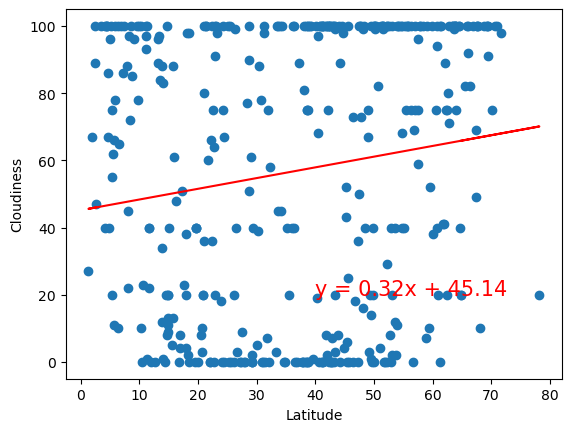

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.12950778116618736


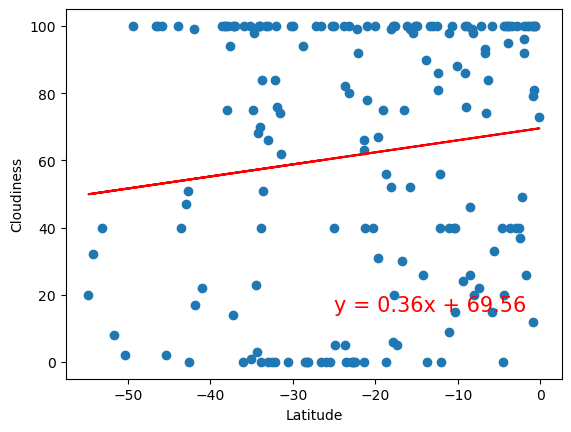

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [87]:
print("Both northern and southern hemispheres show a positive linear regression, but does not appear to be a strong correlation")
print("between cloudiness and latitude.")

Both northern and southern hemispheres show a positive linear regression, but does not appear to be a strong correlation
between cloudiness and latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0010116639755326268


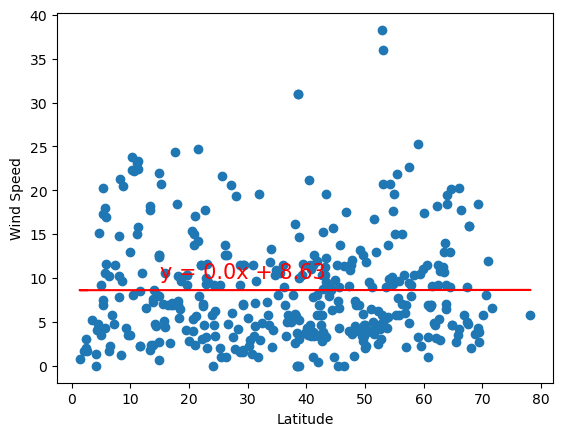

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.42136630288728055


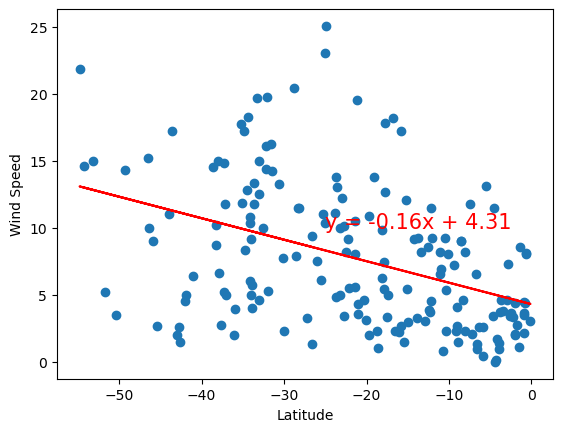

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [90]:
print("Northern hemisphere relationship:")
print("Does not appear to be a correlation between latitude and wind speed")
print("--------------------------------------")
print("Southern hemisphere relationship:")
print("For southern hemisphere cities, the latitude and wind speed shows a negative slope and correlation where cities located close")
print("to Equator the wind speed shows a reduction on the wind speed.")

Northern hemisphere relationship:
Does not appear to be a correlation between latitude and wind speed
--------------------------------------
Southern hemisphere relationship:
For southern hemisphere cities, the latitude and wind speed shows a negative slope and correlation where cities located close
to Equator the wind speed shows a reduction on the wind speed.
